# Exploring a Telecom Customer Churn Dataset

## Introduction

In this notebook we'll explore a dataset containing information about a telecom company's customers. It comes from an [IBM Watson repository](https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/).

We'll use this dataset througout the course to illustrate a variety of machine learning techiniques. We've chosen this dataset because it is complicated enough to teach us things but not so complicated that it sidetracks us. It also gives us an opportunity to reason about a type of business problem that many of you will encounter (if you haven't already).

The dataset comes to us in the form of an Excel file. The name of the file is "WA_FN-UseC_-Telcom-Customer-Churn.xlsx". It's quite a cumbersome name, but we'll stick with it so we'll always know where it came from (you can quickly google the name in a pinch). And in general datasets come to us with various names and it's better to get to used to that right from the start.

We get data in two ways -- by creating it or by getting it from somewhere else. Once we get data, data scientists spend a surprising amount of time getting their heads wrapped around the data, cleaning it, and preparing it to be analyzed. We'll illustrate the main steps of this process here.

The objective of this notebook is to provide a template for data exploration -- the first and perhaps most critical step in any kind of data analysis project including machine learning.

## Load the Data

First thing to do is to load up the data. This depends on the source of the input file -- it could come from a file on the local computer system or from a remote location like an Amazon AWS S3 bucket. For us, the file is already stored locally in the Data folder.

**NOTE:** We'll use some standard Python packages to load, manipulate, and visualize the data. These packages are tools that make our lives as data scientists a lot easier and less tedious. Packages are loaded using the "import" keyword or the "from A import B" or the "from A import B as C" locutions.

In [1]:
import os # to navigate the file system
import numpy as np # for number crunching
import pandas as pd # for data loading and manipulation

# OS-independent way to navigate the file system
# One directory up in relation to directory of this notebook
new_dir = os.path.normpath(os.getcwd() + os.sep + os.pardir)
# Where the file is
file_url = new_dir + os.sep + "Data" + os.sep + "WA_Fn-UseC_-Telco-Customer-Churn.xlsx"
file_url

'/Users/jsubapple/Documents/Dropbox/Repos/MLCourse/Data/WA_Fn-UseC_-Telco-Customer-Churn.xlsx'

In [2]:
# Read the excel sheet into a pandas dataframe
df_churn = pd.read_excel(file_url, sheetname=0)

In [3]:
# Look at the first few lines of the data -- scroll to the right to see more columns
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


How many rows (# of customers) and how many columns (# attritbutes of each customer) do we have?

In [4]:
num_rows, num_cols = df_churn.shape
num_rows, num_cols

(7043, 21)

This meams we have 7,043 customers with each customer tagged with 21 individual attributes such as customerID, gender, SeniorCitizen, etc. Let's get a complete list of the attributes.

## An Overview of Customer Features (or Attributes)

Here is a complete list of features (also known as attributes) that describe each of the 7,043 customers. We don't know yet if all customers are tagged with all 21 features -- we'll find out soon.

In [5]:
# Here is a list of the features with the first 5 values of each feature.
feature_list = list(df_churn)
# First 5 values of each feature in the list
first_5 = [list(df_churn[attribute][0:5]) for attribute in feature_list]
list(zip(feature_list, first_5))

[('customerID',
  ['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU']),
 ('gender', ['Female', 'Male', 'Male', 'Male', 'Female']),
 ('SeniorCitizen', [0, 0, 0, 0, 0]),
 ('Partner', ['Yes', 'No', 'No', 'No', 'No']),
 ('Dependents', ['No', 'No', 'No', 'No', 'No']),
 ('tenure', [1, 34, 2, 45, 2]),
 ('PhoneService', ['No', 'Yes', 'Yes', 'No', 'Yes']),
 ('MultipleLines', ['No phone service', 'No', 'No', 'No phone service', 'No']),
 ('InternetService', ['DSL', 'DSL', 'DSL', 'DSL', 'Fiber optic']),
 ('OnlineSecurity', ['No', 'Yes', 'Yes', 'Yes', 'No']),
 ('OnlineBackup', ['Yes', 'No', 'Yes', 'No', 'No']),
 ('DeviceProtection', ['No', 'Yes', 'No', 'Yes', 'No']),
 ('TechSupport', ['No', 'No', 'No', 'Yes', 'No']),
 ('StreamingTV', ['No', 'No', 'No', 'No', 'No']),
 ('StreamingMovies', ['No', 'No', 'No', 'No', 'No']),
 ('Contract',
  ['Month-to-month',
   'One year',
   'Month-to-month',
   'One year',
   'Month-to-month']),
 ('PaperlessBilling', ['Yes', 'No', 'Yes', 'No', 'Yes'

Some of the features have a discrete set of possible values (e.g., gender, PaymentMethod) while some others can take a range of values that need not be discrete (e.g., tenure, MonthlyCharges, TotalCharges).

### Categorical Feature and Their Possible Values
Some of the features in our dataset are *categorical* -- their values come from a small handful of discrete possibilities. Features like gender and payment method fit are categorical. Categorical features are also known as *discrete* features. Let's separate the discrete/categorical features from the rest -- we'll get a better grip if we look at them separately first.

In [206]:
# Feature index numbers that are *not* categorical.
# Just count from the dataset starting at customerID's index = 0
not_categorical = [0,5,18,19] # CustomerID is not a feature but a unique identifier
# the categorical features are then the complement of the above list
categorical = list(set(range(df_churn.shape[1])) - set(not_categorical))
# get the unique values of the categorical features
[[feature_list[feature_index], list(df_churn.iloc[:, feature_index].unique())] \
    for feature_index in categorical]

[['gender', ['Female', 'Male']],
 ['SeniorCitizen', [0, 1]],
 ['Partner', ['Yes', 'No']],
 ['Dependents', ['No', 'Yes']],
 ['PhoneService', ['No', 'Yes']],
 ['MultipleLines', ['No phone service', 'No', 'Yes']],
 ['InternetService', ['DSL', 'Fiber optic', 'No']],
 ['OnlineSecurity', ['No', 'Yes', 'No internet service']],
 ['OnlineBackup', ['Yes', 'No', 'No internet service']],
 ['DeviceProtection', ['No', 'Yes', 'No internet service']],
 ['TechSupport', ['No', 'Yes', 'No internet service']],
 ['StreamingTV', ['No', 'Yes', 'No internet service']],
 ['StreamingMovies', ['No', 'Yes', 'No internet service']],
 ['Contract', ['Month-to-month', 'One year', 'Two year']],
 ['PaperlessBilling', ['Yes', 'No']],
 ['PaymentMethod',
  ['Electronic check',
   'Mailed check',
   'Bank transfer (automatic)',
   'Credit card (automatic)']],
 ['Churn', ['No', 'Yes']]]

### Numerical Features

Three of the features in this dataset are numerical:
- tenure
- MonthlyCharges
- TotalCharges

Let's explore this dataset in a systematic way. 

In [241]:
numeric_features = [feature_list[n] for n in not_categorical][1:] # CustomerID is not a numeric feature
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

## Sytematically Exploring the Data

Here are ways to systematically explore the data, to live it, to feel it and to breathe it in. The time you spend doing this will pay off. It will enable you to make the right decisions about how to learn from this data.

### Missing Values

In [11]:
# For each column in the dataset, add up the rows in which the column data is missing
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

The zeros mean there are no missing data values. This is very nice, but unusual in most datasets, so we've lucked out. When there are missing values it takes effort and judgement to decide how to handle them. Sometimes it's not clear how to handle missing data even though there are a number of standard techniques to choose from.

One thing to watch out for is a value that seems to be missing, except that it really is an empty string like '' or a string with some spaces such as '   '. These usually trip up the plotting functions and that's one (stressful) way to identify them. 

In [238]:
# For each of the features, find rows where they might be empty -- we'll have to handle these appropriately
def isEmpty(feature):
    empty_rows = []
    for i in range(len(df_churn)):
        if isinstance(df_churn[feature][i], str):
            empty_rows.append(i)
    
    return empty_rows

In [243]:
[[feature,isEmpty(feature)] for feature in numeric_features]

[['tenure', []],
 ['MonthlyCharges', []],
 ['TotalCharges',
  [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]]]

We'll take a look at the rows in TotalCharges to see what to do with these rows. 

In [ ]:
# Test for numeric or empty values in the the categorical rows.

### Views

In [197]:
# View a selection of rows and columns in the df_churn dataframe
df_map = {'telco churn data': df_churn}
def table_view(data_frame_name, feature_list, start_row=3, end_row=5):
    '''
    Displays selected columns and rows of a data frame.
    '''
    # Verify the inputs are sane
    # get the size of the dataframe
    num_rows, num_cols = df_map[data_frame_name].shape
    if (start_row < 0) | (start_row > num_rows) :
        return print("Please use a valid Start Row number. It can be any number from 0 to {}".format(num_rows))
    if (end_row < 0) | (end_row > num_rows) | (end_row < start_row + 1):
        return print("Please use a valid End Row number. \
                     It can be any number from 0 to {} \
                     and must be greater than your start row number".format(num_rows)) 
    
    view = df_map[data_frame_name][feature_list].iloc[start_row:end_row]
    
    return view

In [8]:
# Using the table_view function defined above
# We're calling our dataset 'telco churn data'
table_view('telco churn data', ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges'], 100, 114)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
100,1,0,20.20,20.2
101,1,0,19.45,19.45
102,38,0,95.00,3605.6
103,66,1,45.55,3027.25
104,68,0,110.00,7611.85
105,5,0,24.30,100.2
106,72,0,104.15,7303.05
107,32,0,30.15,927.65
108,43,0,94.35,3921.3
109,72,0,19.40,1363.25


In [9]:
# We're going to explore views in an interactive way
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import Button, HBox, VBox
from IPython.display import display
from IPython.display import clear_output

In [115]:
# Layout the interactive view widgets

# Data Frame Chooser Dropdown
dataFrame = widgets.Select(
             options=['telco churn data'],
             value='telco churn data',
             description='Data Source:',
             disabled=False
            )

# Start Row Text Field
startRow = widgets.IntText(
            value=7,
            description='Start Row:',
            disabled=False
           )

# End Row Text Field
endRow = widgets.IntText(
           value=12,
           description='End Row:',
           disabled=False
          )

# Attribute Selector (Multiple Select)
allFeatures = widgets.SelectMultiple(
               options = feature_list,
               rows = 20,
               description = 'Select Mulitple Features:',
               value = ['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges']
              )

# Button
button = widgets.Button(
          description='Show View',
          disabled=False,
          button_style='info', # 'success', 'info', 'warning', 'danger' or ''
          tooltip='Go!',
          icon=''
         )

def on_button_clicked(b):
    # Pass the values of the widgets to the table_view function
    clear_output()
    return table_view(dataFrame.value, list(allFeatures.value), startRow.value, endRow.value)
    
button.on_click(on_button_clicked)

# Display the elements
HBox([VBox([dataFrame, allFeatures, button]), VBox([startRow, endRow])])

### How Balanced are the Categorical Features?

How are the categorical features of the dataset distributed? For example, are there very few senior citizens? Is it the case that an overwhelming number of customers in the dataset have no dependents? Understanding how the features are balanced will give us a sense of how *generalizable* the results obtained from the dataset will be.

In [149]:
# We keep plotting simple and use common packages and defaults
import matplotlib.pyplot as plt
import seaborn as sns
# Set the aesthetics for Seaborn visuals
sns.set(context='notebook', 
        style='whitegrid', 
        palette='deep', 
        font='sans-serif', 
        font_scale=1.3, 
        color_codes=True, 
        rc=None)
%matplotlib inline

In [35]:
[feature_list[feature_index] for feature_index in categorical]

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [196]:
# Set up the plot
def plotFeatureCount(feature_name, count_flag):
    fig, ax = plt.subplots(figsize=(12,7))
    
    if count_flag == 'Count':
        ax = sns.countplot(x=feature_name, data=df_churn)
    elif count_flag == 'Percentage':
        x = df_churn[feature_name].unique()
        y = [len([val for val in df_churn[feature_name] if val == x_val])/len(df_churn[feature_name]) * 100 \
             for x_val in x]
        ax = sns.barplot(x,y)
    
    plt.ylabel(count_flag)
    return plt.show()

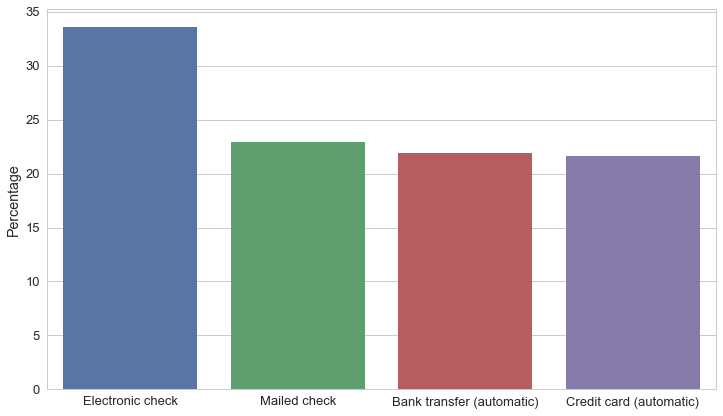

In [195]:
# set up the plot for interactivity
# Dropdown
w_features = widgets.Dropdown(
               options = [feature_list[feature_index] for feature_index in categorical],
               description = 'Select Feature:',
               value = 'gender',
               button_style='info'
              )

w_radio = widgets.RadioButtons(
    options=['Count', 'Percentage'],
    value='Count',
    description='Display:',
    disabled=False
)

def on_value_change(change):
    # Pass the value of the dropdown to the plotFeatureCount function
    clear_output()
    return plotFeatureCount(w_features.value, w_radio.value)

w_features.observe(on_value_change)
w_radio.observe(on_value_change)


# Show a default plot
plotFeatureCount(w_features.value, w_radio.value)
# Show the widgets
HBox([w_features, w_radio])

### How are the Numerical Features Distributed?

['tenure', 'MonthlyCharges', 'TotalCharges']

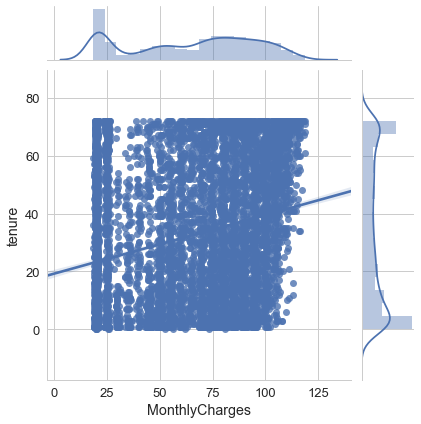

In [219]:
g = sns.JointGrid(x="MonthlyCharges", y="tenure", data=df_churn)
g = g.plot(sns.regplot, sns.distplot)

In [211]:
# Set up the plot
def plotFeatureHist(feature_name):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.distplot(df_churn[feature_name], kde=False)
    return plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

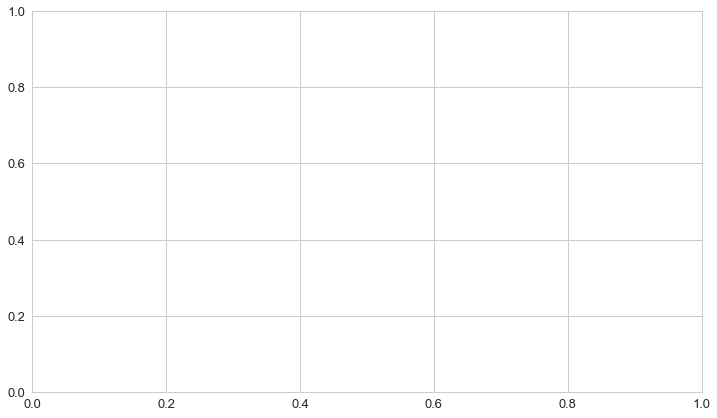

In [222]:
plotFeatureHist('TotalCharges')